In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
initial_globals = set(dir())

In [3]:
from fastai import *
fastai_diff = set(dir()) - initial_globals
from fastai.vision import *
fasti_vision_set =  set(dir()) - initial_globals - fastai_diff
import fastai

### Python methods
_dir()_ will give you the list of in scope variables
_globals()_ will give you a dictionary of global variables
_locals()_ will give you a dictionary of local variables

In [4]:
print('FASTAI IMPORTS:')
for i, el in sorted(enumerate(fastai_diff)):
    if i % 4 == 0: print()
    print('{:28}'.format(el), end="\t")
print('\n')
print('-' * 100)
print('FASTAI VISION IMPORTS:')
for i, el in sorted(enumerate(fasti_vision_set)):
    if i % 4 == 0: print()
    print('{:28}'.format(el), end="\t")
print()

FASTAI IMPORTS:

do_annealing_poly           	ListSizes                   	dice                        	SaveModelCallback           	
ListRules                   	tensor                      	Hashable                    	to_int                      	
conv_layer                  	NPArrayMask                 	datapath4file               	NPImage                     	
Weights                     	json                        	one_cycle_scheduler         	range_children              	
calc_loss                   	re                          	untar_data                  	Hooks                       	
MasterBar                   	TensorImage                 	ORTH                        	OptStrList                  	
KWArgs                      	download_url                	annealing_no                	MetricFuncList              	
ModuleList                  	TensorDataset               	MetricFunc                  	DataBunch                   	
bn2float                    	GradientClipping  

In [5]:
import pathlib
FASTAI_FOLDER = str(pathlib.PurePath(fastai.__file__).parent)
!echo fastai folder:
!echo {FASTAI_FOLDER}
!echo
!echo fastai contents:
!ls {FASTAI_FOLDER}
!echo
!echo --------------
!echo fastai __init__.py exports:
!echo --------------
!cat {FASTAI_FOLDER}/__init__.py
!echo 
!echo --------------
!echo fastai.vision exports
!echo --------------
!cat {FASTAI_FOLDER}/vision/__init__.py

fastai folder:
/home/pauloffn/anaconda3/envs/ds/lib/python3.7/site-packages/fastai

fastai contents:
basic_data.py	collab.py    imports	  __pycache__	 train.py
basic_train.py	core.py      __init__.py  tabular	 utils
callback.py	datasets.py  layers.py	  text		 version.py
callbacks	gen_doc      metrics.py   torch_core.py  vision

--------------
fastai __init__.py exports:
--------------
from .basic_train import *
from .callback import *
from .callbacks import *
from .core import *
from .basic_data import *
from .layers import *
from .metrics import *
from .torch_core import *
from .train import *
from .gen_doc.nbdoc import doc
from .datasets import *
from .utils.collect_env import *
from .version import __version__

--------------
fastai.vision exports
--------------
from .learner import *
from .data import *
from .image import *
from .transform import *
from .tta import *
from . import models


### dataset: 
#### http://www.robots.ox.ac.uk/~vgg/data/pets/

In [6]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None)
    Download `url` if doesn't exist to `fname` and un-tgz to folder `dest`



In [7]:
HOMEPATH_LIST = !echo $HOME
DATA_BASEDIR = pathlib.Path(HOMEPATH_LIST[0]) / 'data'
DATA_DIR = DATA_BASEDIR / 'oxford-iiit-pet'
print(DATA_BASEDIR, DATA_DIR)


/home/pauloffn/data /home/pauloffn/data/oxford-iiit-pet


In [8]:
DOWNLOAD_FOLDER = pathlib.Path(HOMEPATH_LIST[0]) / 'Downloads'

if not DOWNLOAD_FOLDER.exists():
    DOWNLOAD_FOLDER.mkdir()
    
if not DATA_BASEDIR.exists():
    DATA_BASEDIR.mkdir()


In [9]:
!ls {DOWNLOAD_FOLDER} | grep tgz

In [10]:
dst = untar_data(URLs.PETS, fname=(DOWNLOAD_FOLDER / 'fastai_pets.tgz'), dest=DATA_DIR, ); dst
# untar_data ta miada
# - nao da erro se o fname for um diretorio existente
# - se especidicar uma pasta q enao existe em dest ele nao usa o mesmo nome da pasta e sim o nome original no folder acima e nao retorna o dest que ele mesmo escolheu
# - se a pasta existir ele num faz nada


PosixPath('/home/pauloffn/data/oxford-iiit-pet')

## Jupyter Tip
If the Hbox widget doesnt work, close everything and run into the notebook env:
```jupyter labextension install @jupyter-widgets/jupyterlab-manager```

In [11]:
DATA_DIR.ls()

['annotations', 'images']

In [12]:
path_anno = DATA_DIR / 'annotations'
path_img  = DATA_DIR / 'images'

In [13]:
fnames = get_image_files(path_img)
fnames[:10]

[PosixPath('/home/pauloffn/data/oxford-iiit-pet/images/Russian_Blue_106.jpg'),
 PosixPath('/home/pauloffn/data/oxford-iiit-pet/images/Russian_Blue_61.jpg'),
 PosixPath('/home/pauloffn/data/oxford-iiit-pet/images/staffordshire_bull_terrier_116.jpg'),
 PosixPath('/home/pauloffn/data/oxford-iiit-pet/images/staffordshire_bull_terrier_82.jpg'),
 PosixPath('/home/pauloffn/data/oxford-iiit-pet/images/samoyed_186.jpg'),
 PosixPath('/home/pauloffn/data/oxford-iiit-pet/images/japanese_chin_110.jpg'),
 PosixPath('/home/pauloffn/data/oxford-iiit-pet/images/Ragdoll_131.jpg'),
 PosixPath('/home/pauloffn/data/oxford-iiit-pet/images/Russian_Blue_31.jpg'),
 PosixPath('/home/pauloffn/data/oxford-iiit-pet/images/saint_bernard_151.jpg'),
 PosixPath('/home/pauloffn/data/oxford-iiit-pet/images/boxer_142.jpg')]

In [19]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'
print(str(fnames[0]), '--->', re.findall(pat, str(fnames[0])))

/home/pauloffn/data/oxford-iiit-pet/images/Russian_Blue_106.jpg ---> ['Russian_Blue']


In [15]:
?ImageDataBunch.from_name_re

Signature: ImageDataBunch.from_name_re(path: Union[pathlib.Path, str], fnames: Collection[pathlib.Path], pat: str, valid_pct: int = 0.2, test: str = None, **kwargs)
Docstring: <no docstring>
File:      ~/anaconda3/envs/ds/lib/python3.7/site-packages/fastai/vision/data.py
Type:      method


### args:
- **path**: directory with images
- **fnames**: list with fullpathnames for each file
- **pat**: regex pattern (/data/oxford-iiit-pet/images/**Russian_Blue**_106.jpg)
### kwargs:
- **ds_tfms**: dataset transformations
- **size**: resize images to this size

In [24]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats) ## scale numbers

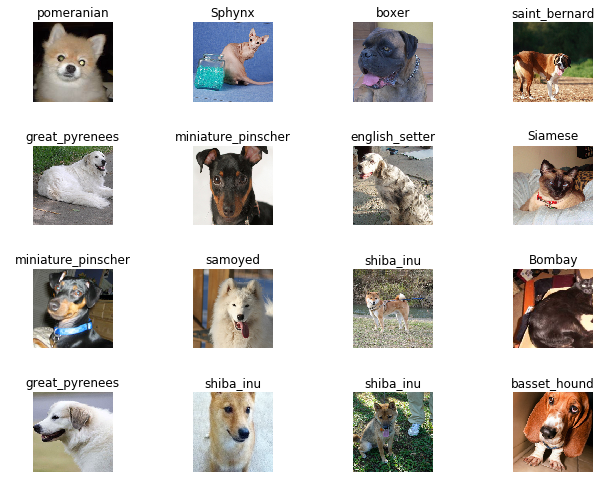

In [28]:
data.show_batch(rows=4, figsize=(9,7))

In [29]:
data.classes

['Russian_Blue',
 'staffordshire_bull_terrier',
 'samoyed',
 'japanese_chin',
 'Ragdoll',
 'saint_bernard',
 'boxer',
 'Siamese',
 'leonberger',
 'pomeranian',
 'basset_hound',
 'american_pit_bull_terrier',
 'wheaten_terrier',
 'american_bulldog',
 'great_pyrenees',
 'beagle',
 'scottish_terrier',
 'keeshond',
 'Persian',
 'english_cocker_spaniel',
 'havanese',
 'newfoundland',
 'Sphynx',
 'British_Shorthair',
 'Bombay',
 'shiba_inu',
 'Egyptian_Mau',
 'Abyssinian',
 'Maine_Coon',
 'yorkshire_terrier',
 'chihuahua',
 'miniature_pinscher',
 'pug',
 'english_setter',
 'german_shorthaired',
 'Birman',
 'Bengal']

In [30]:
# data.c == len(data.classes)
data.c

37

In [31]:
learn = ConvLearner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/pauloffn/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 29287015.66it/s]


models are downloaded to **~/.torch/models** folder

In [32]:
learn.fit_one_cycle(4)

Total time: 02:59
epoch  train loss  valid loss  error_rate
1      1.164978    0.309484    0.099135    (00:46)
2      0.497441    0.255553    0.094478    (00:44)
3      0.309149    0.228419    0.075848    (00:44)
4      0.219700    0.222020    0.079840    (00:44)



In [37]:
learn.save('fastai-dogs-cats-stateg-1')

### Where does the model go ?

In [50]:
print(learn.path, learn.model_dir, sep='\t')
!ls {learn.path}/{learn.model_dir}

/home/pauloffn/data/oxford-iiit-pet/images	models
fastai-dogs-cats-stateg-1.pth


In [51]:
LESSON_MODELS_PATH = DATA_BASEDIR / 'fastai_models'
if not LESSON_MODELS_PATH.exists():
    LESSON_MODELS_PATH.mkdir()

In [52]:
learn.save(LESSON_MODELS_PATH / 'l01-dogs-cats-stage-1')

In [53]:
!ls {LESSON_MODELS_PATH}

l01-dogs-cats-stage-1.pth


## Results

In [54]:
interp = ClassificationInterpretation.from_learner(learn)

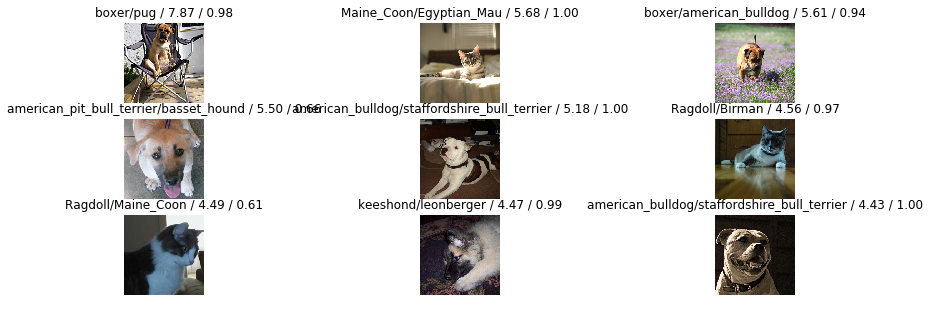

In [62]:
interp.plot_top_losses(9, figsize=(15,5))

In [63]:
doc(interp.plot_top_losses)

plot_top_losses 
 plot_top_losses ( k , largest = True , figsize = (12, 12) ) 
 
 Show images in top_losses along with their loss, label, and prediction. [source] 
 Show in docs

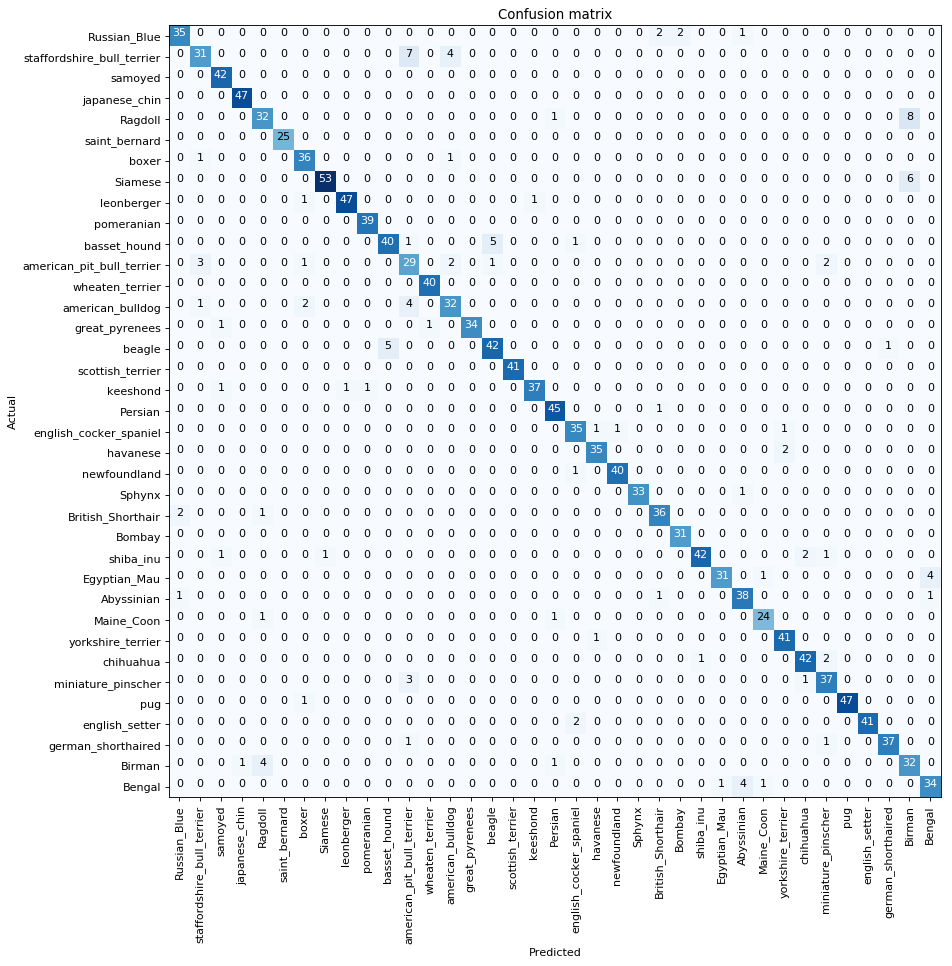

In [65]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=80)

In [66]:
interp.most_confused(min_val=4)

[('Ragdoll', 'Birman', 8),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('Siamese', 'Birman', 6),
 ('basset_hound', 'beagle', 5),
 ('beagle', 'basset_hound', 5)]

## Unfreezing, fine-tuning, and learning rates

In [67]:
learn.unfreeze()

In [68]:
learn.fit_one_cycle(1)

Total time: 00:44
epoch  train loss  valid loss  error_rate
1      1.006138    0.550730    0.175649    (00:44)



In [72]:
learn.load(LESSON_MODELS_PATH / 'l01-dogs-cats-stage-1')

In [73]:
learn.lr_find()

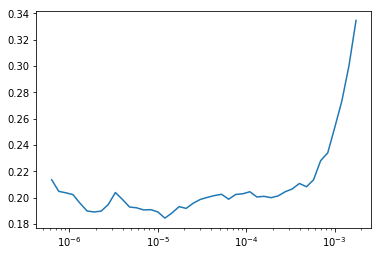

In [74]:
learn.recorder.plot()

### One Cycle Policy

Cycle is number of iterations where we go from lower bound learning rate to higher bound and back to lower bound. Cycle may not have boundary on epoch, but in practice it usually does. Stepsize is half of cycle. So Stepsize is number of iterations where we want learning rate to go from one bound to the other.

Leslie Smith recommends to do one cycle of learning rate of 2 steps of equal length. We choose maximum learning rate using range test. We use lower learning rate as 1/5th or 1/10th of maximum learning rate. We go from lower learning rate to higher learning rate in step 1 and back to lower learning rate in step 2. We pick this cycle length slightly lesser than total number of epochs to be trained. And in last remaining iterations, we annihilate learning rate way below lower learning rate value(1/10 th or 1/100 th).

The motivation behind this is that, during the middle of learning when learning rate is higher, the learning rate works as regularisation method and keep network from overfitting. This helps the network to avoid steep areas of loss and land better flatter minima.

(https://medium.com/@nachiket.tanksale/finding-good-learning-rate-and-the-one-cycle-policy-7159fe1db5d6)


In [76]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

Total time: 01:34
epoch  train loss  valid loss  error_rate
1      0.210759    0.218639    0.079840    (00:46)
2      0.190220    0.211509    0.077179    (00:48)



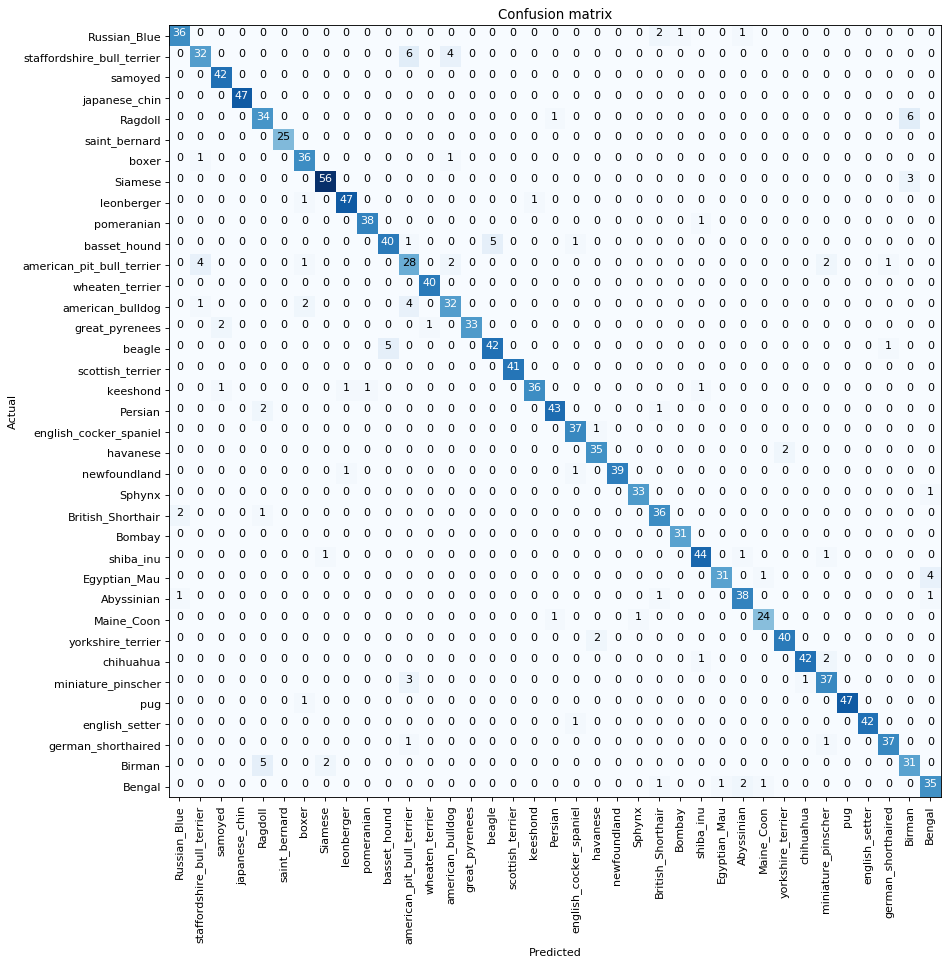

In [77]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=80)